In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
import numpy as np
import math
from scipy import stats
import scipy.special

# Open files

In [2]:
temp = open('A.fna','r').read().split('\n')
A = ''.join(temp)

temp = open('B.fna','r').read().split('\n')
B = ''.join(temp)

C='HOOOOLA\nwey'

# Basic tests

## Make sure the files follow a DNA structure

In [3]:
def isDNA(Z):
    nonNuc=[]
    for N in Z:
        if N!='A' and N!='T' and N!='G' and N!='C':# and N!='\n':
            nonNuc.append(N)
    if len(nonNuc)==0:
        toPrint='All letters are valid nucleotides'
        return(True, toPrint)
    else:
        toPrint = f'The sequence contains the letters: {nonNuc}, which are not a valid nucleotides'
        return(False, toPrint)

print(f'is A a valid DNA sequence? -> {isDNA(A)}')
print(f'is B a valid DNA sequence? -> {isDNA(B)}')
print(f'is C a valid DNA sequence? -> {isDNA(C)}')

print('')
print(f'A contains {len(A)} nucleotides')
print(f'B contains {len(B)} nucleotides')

is A a valid DNA sequence? -> (True, 'All letters are valid nucleotides')
is B a valid DNA sequence? -> (True, 'All letters are valid nucleotides')
is C a valid DNA sequence? -> (False, "The sequence contains the letters: ['H', 'O', 'O', 'O', 'O', 'L', '\\n', 'w', 'e', 'y'], which are not a valid nucleotides")

A contains 981133 nucleotides
B contains 981133 nucleotides


## Probability of finding a given nucleotide

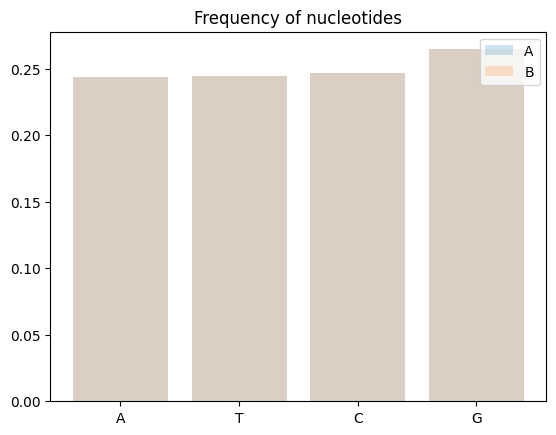

{'A': 0.24399750084850882, 'T': 0.24446736579036685, 'C': 0.24694715191518377, 'G': 0.26458798144594053}


In [4]:
def countNuc(Z, N):
    num_N = 0
    for nuc in Z:
        if nuc==N:
            num_N+=1
    return num_N

A_single_probs = {}
B_single_probs = {}
for nuc in ['A', 'T', 'C', 'G']:
    A_single_probs[nuc] = countNuc(A,nuc)/len(A)
    B_single_probs[nuc] = countNuc(B,nuc)/len(B)

#A = pd.DataFrame.from_dict(A_single_probs)

plt.bar(A_single_probs.keys(), A_single_probs.values(), alpha=0.2, label='A')
plt.bar(B_single_probs.keys(), B_single_probs.values(), alpha=0.2, label='B')
plt.title('Frequency of nucleotides')
plt.legend(loc='best')
plt.show()
#plt.xticks([0, 1.5], rotation=0)
# plt.hist(A_single_probs, histtype='step', color='red', label='A')
# plt.hist(B_single_probs, histtype='step', color='green', label='B')
# plt.title('Probability of each')
# plt.legend(loc='best')
# plt.show()

# sns.countplot(A_single_probs)

print(A_single_probs)

So apparently we have the same number frequency of appearance of each nucleotide, except for G which is slightly more common. 

# A bit more advanced

## Probability distribution of n-tuples

How many n-tuples can we create in a string of length N? 

- If we consider sequential (non-overlapping) n-tuples, we can create $N//n$ of them <br>
- If we allow the starting point to change (we don't know where the "transcription starting point" is), any of the N letters can be the starting point, except for the last n-1, so we can have $N-(n-1)$ n-tuples

In [230]:
# Define funtions to give probability of an ntuple to appear

def prob_ntuple(Z, ntuple):
    N = len(Z)
    n = len(ntuple)
    normalization = (N-n+1)
    
    results=0
    for i in range(N-n+1):
        if Z[i:i+n] == ntuple:
            results += 1
    return results/normalization

def prob_ntuple_no_overlap(Z, ntuple):
    N=len(Z)
    n=len(ntuple)
    normalization = N//n

    results=0
    for i in range(0,N-n,n):
        if Z[i:i+n] == ntuple:
            results += 1
    return results/normalization

In [339]:
A_single_probs[i[0]]*A_single_probs[i[1]]*A_single_probs[i[2]]

0.01852295787981421

In [334]:
# Compute probabilities for each codon

A_codons, B_codons, random_codons = ({}, {}, {})
A_codons_no_overlap, B_codons_no_overlap = ({}, {})
for i in itertools.product(['A','T', 'C', 'G'], ['A','T', 'C', 'G'], ['A','T', 'C', 'G']):
    codon= ''.join(i)
    A_codons[codon] = prob_ntuple(A,codon)
    B_codons[codon] = prob_ntuple(B,codon)
    random_codons[codon] = A_single_probs[i[0]]*A_single_probs[i[1]]*A_single_probs[i[2]]
    A_codons_no_overlap[codon] = prob_ntuple_no_overlap(A,codon)
    B_codons_no_overlap[codon] = prob_ntuple_no_overlap(B,codon)
    #print(codon, A_codons[codon], B_codons[codon])

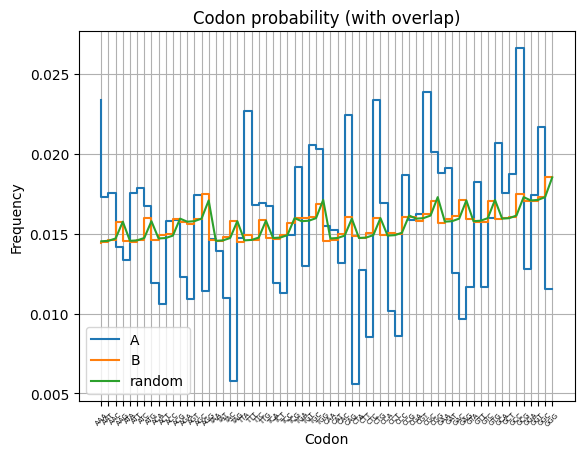

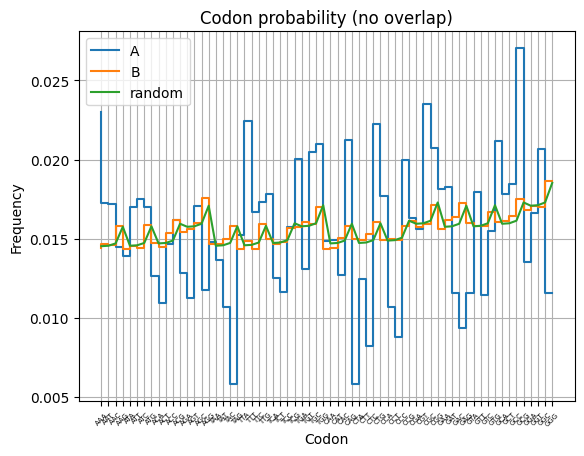

In [341]:
plt.step(A_codons.keys(), A_codons.values(), label='A')
plt.step(B_codons.keys(), B_codons.values(), label='B')
#plt.plot(B_codons_no_overlap.keys(), [4**(-3)]*len(B_codons_no_overlap.keys()), ':', label='random')
plt.plot(random_codons.keys(), random_codons.values(), label='random')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.title('Codon probability (with overlap)')
plt.xlabel('Codon')
plt.ylabel('Frequency')
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=5)    # fontsize of the tick labels
plt.grid()
plt.show()

plt.step(A_codons_no_overlap.keys(), A_codons_no_overlap.values(), label='A')
plt.step(B_codons_no_overlap.keys(), B_codons_no_overlap.values(), label='B')
#plt.plot(B_codons_no_overlap.keys(), [4**(-3)]*len(B_codons_no_overlap.keys()), ':', label='random')
plt.plot(random_codons.keys(), random_codons.values(), label='random')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.title('Codon probability (no overlap)')
plt.xlabel('Codon')
plt.ylabel('Frequency')
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=5)    # fontsize of the tick labels
plt.grid()
plt.show()


(I don't really see the use of this, but I wanted to check we're not missing anything)

In [174]:
def big_differences(Z_codons, Z_codons_no_overlap, tol):
    for k in Z_codons.keys():
        dif = Z_codons[k] - Z_codons_no_overlap[k]
        if np.abs(dif) > tol:
            if dif>0:
                whichIsGreater='prob. with overlap is greater'
            else:
                whichIsGreater='prob. with no overlap is greater'
            print(f'{k}, difference is {np.abs(dif)}, {whichIsGreater}')
    # If the max difference is greater than tol, then say it
    if max([np.abs(Z_codons[k]-Z_codons_no_overlap[k]) for k in Z_codons.keys()]) < tol:
        print(f'None (all differences are less than {tol})')

tol=1e-3
print(f'Codons whose probability differ by more than {tol} when counted with or with no overlap')
print('-> In file A:')
big_differences(A_codons, A_codons_no_overlap,tol)
print('-> In file B:')
big_differences(B_codons, B_codons_no_overlap,tol)

Codons whose probability differ by more than 0.001 when counted with or with no overlap
-> In file A:
ACC, difference is 0.0010905930932899564, prob. with overlap is greater
TCA, difference is 0.0010416368499511289, prob. with no overlap is greater
CAG, difference is 0.001173157551631835, prob. with overlap is greater
CTG, difference is 0.001133408548969917, prob. with overlap is greater
CCG, difference is 0.0012566925839809853, prob. with no overlap is greater
-> In file B:
None (all differences are less than 0.001)


### Testing a null hypothesis

Null hypothesis: the file can be regarded as a sequential series of codons (triplets) sampled from a multinomial distribution with equal probability $p=\frac{1}{4^3}=0.016$ for each codon. 
Thus, we can compute the probability of obtaining the observed $x_i$ counts (no overlap) for each codon i, given that the the probability for each codon is 0.016. 

Recall the multinomial distribution for n trials and k categories is:
$$ p(x_1, x_2, ..., x_k; n) = n! \frac{\prod_{i}^{k} p_i^{x_i}}{\prod_i^k x_i!} $$

We will compute the log of this probability

In [276]:
N=len(A)
n=N//3
p=4**(-3)

def log_prob(A_codons_no_overlap):
    sum_log_xi_fact = 0                            # \sum_i log(x_i)!
    sum_xi_log_pi = 0                              # \sum_i (x_i \log(p_i))
    for k in A_codons_no_overlap.keys():
        x = A_codons_no_overlap[k]*n 
        sum_log_xi_fact += x*math.log(x)-x #Using Stirling
        sum_xi_log_pi += x*math.log(p)
    
    #print(p_product)
    log_nfact = n*math.log(n)-n            # log(n!), using Stirling
    return (log_nfact+sum_xi_log_pi-sum_log_xi_fact)

A_logprob = log_prob(A_codons_no_overlap)
B_logprob = log_prob(B_codons_no_overlap)

print(f'A has a prob to occur of e^{A_logprob}, while B has a prob to occur of e^{B_logprob}')
print(f'Number of sites is {n}, sample space is 64^{n}, or approximately e^{n*3}')

A has a prob to occur of e^-12894.193335101008, while B has a prob to occur of e^-594.5553037771024
Number of sites is 327044, sample space is 64^327044, or approximately e^981132


That is not yet the p-value. Based on its definition, we will define our p-value as the probability to observe a deviation from the null hypothesis at least as extreme as that observed in the data. Looking at our data, the value that deviates the most from the multinomial distribution is that of the codon GCG. What is the probability of obtaining at least those many times the codon GCG given that the probability of this codon is $p=4^{-3}$?

In [394]:
def bigger_deviations(Z_codons_no_overlap):
    #Z_deviations = [np.abs(Z_codons_no_overlap[k]-random_codons[k]) for k in random_codons.keys()]
    Z_deviations = [(Z_codons_no_overlap[k]-random_codons[k]) for k in random_codons.keys()]
    max_deviation = max(Z_deviations)
    max_codon_index = Z_deviations.index(max_deviation)
    max_codon = list(Z_codons_no_overlap.keys())[max_codon_index]
    max_prob = Z_codons_no_overlap[max_codon]
    return max_codon, math.floor(max_prob*n)


A_max_deviation = max(A_codons_no_overlap, key=A_codons_no_overlap.get)
print(f'In A, max deviation occurs in codon {A_max_deviation}, having probability {A_codons_no_overlap[A_max_deviation]}')

B_max_deviation = max(B_codons_no_overlap, key=B_codons_no_overlap.get)
print(f'In B, max deviation occurs in codon {B_max_deviation}, having probability {B_codons_no_overlap[B_max_deviation]}')
A_ntimes_max = A_codons_no_overlap[A_max_deviation]*n
B_ntimes_max = B_codons_no_overlap[B_max_deviation]*n

def prob_binomial_ntimes(num_times, p):
    zeroone = n*math.log(n)-n
    zerotwo = A_ntimes_max*math.log(A_ntimes_max)-A_ntimes_max
    zerothree = (n-A_ntimes_max)*math.log(n-A_ntimes_max)-(n-A_ntimes_max)
    zero = math.log(math.comb(n,int(A_ntimes_max)))
    first = zeroone-zerotwo-zerothree
    second = (p**(num_times))
    third = (1-p)**(n*num_times)
    prob = first*second 
    return prob

#prob_binomial_ntimes(A_ntimes_max,p)

A_p_value=1-scipy.special.betainc(n-A_ntimes_max, 1+A_ntimes_max, 1-B_single_probs['G']*B_single_probs['C']*B_single_probs['G'])
B_p_value=1-scipy.special.betainc(n-B_ntimes_max, 1+B_ntimes_max, 1-B_single_probs['G']**3)
print(f'p-value for A: {A_p_value}')
print(f'p-value for B: {B_p_value}')

A_md_codon, A_md_n = bigger_deviations(A_codons_no_overlap)
B_md_codon, B_md_n = bigger_deviations(B_codons_no_overlap)
A_md_prob = A_single_probs[A_md_codon[0]]*A_single_probs[A_md_codon[1]]*A_single_probs[A_md_codon[2]]
B_md_prob = B_single_probs[B_md_codon[0]]*B_single_probs[B_md_codon[1]]*B_single_probs[B_md_codon[2]]
print(A_md_codon, A_md_n, math.floor(A_md_prob*n))
print(B_md_codon, B_md_n, math.floor(B_md_prob*n))

A_p_value=1-scipy.special.betainc(n-A_md_n, 1+A_md_n, 1-A_md_prob)
B_p_value=1-scipy.special.betainc(n-B_md_n, 1+B_md_n, 1-B_md_prob)
print(f'p-value for A: {A_p_value}')
print(f'p-value for B: {B_p_value}')

In A, max deviation occurs in codon GCG, having probability 0.02702388669414513
In B, max deviation occurs in codon GGG, having probability 0.0186549822042294
p-value for A: 1.1102230246251565e-16
p-value for B: 0.2850637865742507
GCG 8838 5653
AGG 5746 5586
p-value for A: 1.1102230246251565e-16
p-value for B: 0.015669413161821577


## Conditional probabilities

Another expected feature of a non-random nucleotide sequence would be that the appearance of a nucleotide in a codon is not independent of the rest of the nucleotides in the codon. 
Thus for example, the sequence AAA would not be equally likely as the sequence AAG. 

We will test the following null hypothesis: the sampling process of nucleotides in the sequences is at most (in terms of its memory capacity) Markovian. 

We already took a step by proving a less strict null hypothesis: The sampling process of nucleotides in the sequences is iid. This is, $p(N1 N2 N3) = p(N1) p(N2) p(N3)$

We will now attempt to falsify a Markovianity null hypothesis, that is, that: $$p(N1 N2 N3) = p(N2 N1) p(N3|N2 N1) = p(N1) p(N2|N1) p(N3|N2 N1) =  p(N1) p(N2|N1) p(N3|N2)$$

In [434]:
def probN2_givenN1(Z,N1,N2):
    num_N1=0
    num_N1_N2=0
    for i in range(len(Z)-1):
        if Z[i] == N1:
            num_N1 += 1
            if Z[i+1] == N2:
                num_N1_N2 += 1
    return num_N1_N2/num_N1


def probN3_givenN1N2(Z,N1,N2,N3):
    num_N1N2=0
    num_N1N2_N3=0
    for i in range(len(Z)-2):
        if Z[i] == N1 and Z[i+1]==N2:
            num_N1N2 += 1
            if Z[i+2] == N3:
                num_N1N2_N3 += 1
    return num_N1N2_N3/num_N1N2

In [435]:
A_simple_conditionals, B_simple_conditionals,iid_duplets = ({}, {},{})
# Iterate over all possible duplets (4^2 of them)
for i in itertools.product(['A','T', 'C', 'G'], ['A','T', 'C', 'G']):#, ['A','T', 'C', 'G']):
    duplet= ''.join(i)
    A_simple_conditionals[duplet]=probN2_givenN1(A,i[0],i[1])
    B_simple_conditionals[duplet]=probN2_givenN1(B,i[0],i[1])
    iid_duplets[duplet] = B_single_probs[i[0]]*B_single_probs[i[1]]

# A_simple_conditionals
# B_simple_conditionals


A_double_conditionals, B_double_conditionals = ({}, {})
# Iterate over all possible triplets (4^3 of them)
for i in itertools.product(['A','T', 'C', 'G'], ['A','T', 'C', 'G'], ['A','T', 'C', 'G']):
    triplet= ''.join(i)
    A_double_conditionals[triplet]=probN3_givenN1N2(A,i[0],i[1],i[2])
    B_double_conditionals[triplet]=probN3_givenN1N2(B,i[0],i[1],i[2])



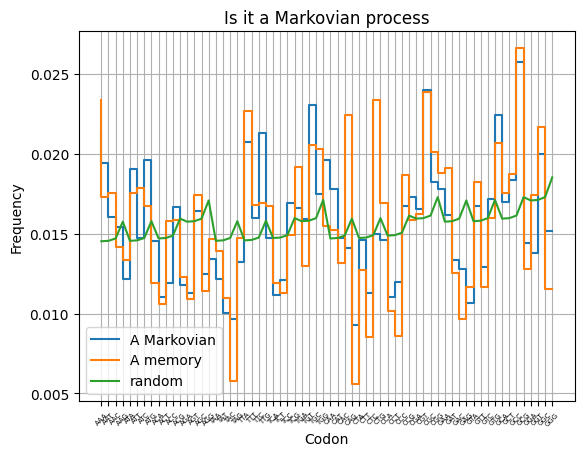

In [424]:
A_Markovian, A_memory = ({},{})
B_Markovian, B_memory = ({},{})
for i in itertools.product(['A','T', 'C', 'G'], ['A','T', 'C', 'G'], ['A','T', 'C', 'G']):
    triplet= ''.join(i)
    N1N2 = i[0]+i[1]
    N2N3 = i[1]+i[2]
    N1N2N3 = i[0]+i[1]+i[2]
    A_Markovian[triplet] = A_single_probs[i[0]]*A_simple_conditionals[N1N2]*A_simple_conditionals[N2N3]
    A_memory[triplet] = A_single_probs[i[0]]*A_simple_conditionals[N1N2]*A_double_conditionals[N1N2N3]
    B_Markovian[triplet] = B_single_probs[i[0]]*B_simple_conditionals[N1N2]*B_simple_conditionals[N2N3]
    B_memory[triplet] = B_single_probs[i[0]]*B_simple_conditionals[N1N2]*B_double_conditionals[N1N2N3]

plt.step(A_Markovian.keys(), A_Markovian.values(), label='A Markovian')
plt.step(A_memory.keys(), A_memory.values(), label='A memory')
plt.plot(random_codons.keys(), random_codons.values(), label='random')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.title('Is it a Markovian process')
plt.xlabel('Codon')
plt.ylabel('Frequency')
plt.rc('xtick', labelsize=5)    # fontsize of the tick labels
plt.grid()
plt.show()

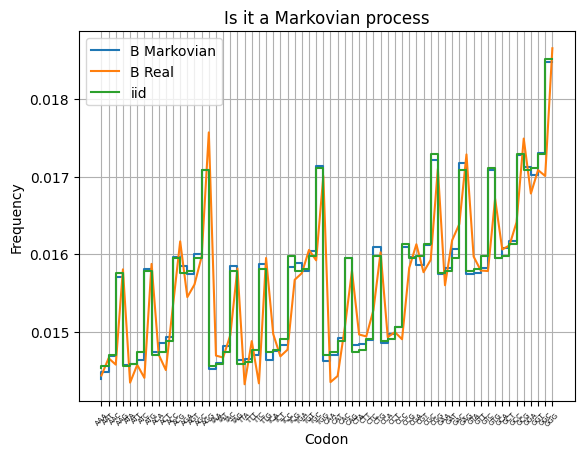

In [469]:
plt.step(B_Markovian.keys(), B_Markovian.values(), label='B Markovian')
#plt.step(B_memory.keys(), B_memory.values(), label='B memory')
plt.plot(B_codons_no_overlap.keys(), B_codons_no_overlap.values(), label='B Real')
plt.step(random_codons.keys(), random_codons.values(), label='iid')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.title('Is it a Markovian process')
plt.xlabel('Codon')
plt.ylabel('Frequency')
plt.rc('xtick', labelsize=5)    # fontsize of the tick labels
plt.grid()
plt.show()

In [456]:
print(B_N2_N1['AG'],B_real['AG'])

0.06467522751757407 0.06467529343656103


In [458]:
B_N2_N1, iid_N2_N1, B_real = ({},{},{})
A_N2_N1, A_real = ({},{})
for i in itertools.product(['A','T', 'C', 'G'], ['A','T', 'C', 'G']):#, ['A','T', 'C', 'G']):
    N1N2 = i[0]+i[1]
    N1 = i[0]
    N2 = i[1]
    B_N2_N1[N1N2] = B_simple_conditionals[N1N2]*B_single_probs[N1]
    A_N2_N1[N1N2] = A_simple_conditionals[N1N2]*A_single_probs[N1]
    iid_N2_N1[N1N2] = B_single_probs[N2]*B_single_probs[N1]
    B_real[N1N2] = prob_ntuple(B,N1N2)
    A_real[N1N2] = prob_ntuple(A,N1N2)

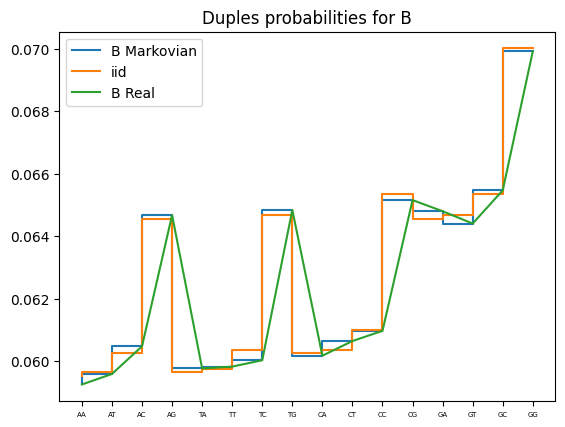

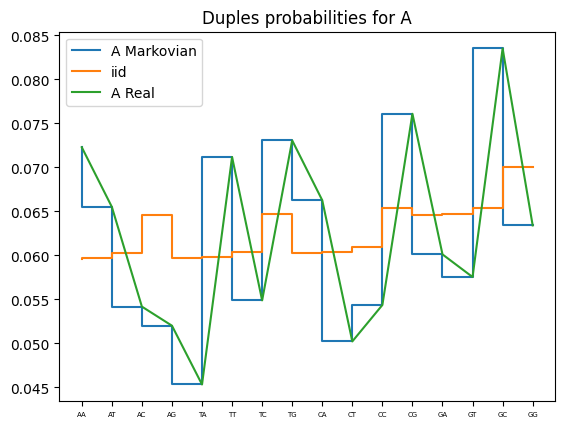

In [459]:
plt.step(B_N2_N1.keys(), B_N2_N1.values(), label='B Markovian')
plt.step(iid_N2_N1.keys(), iid_N2_N1.values(), label = 'iid')
plt.plot(B_real.keys(), B_real.values(), label = 'B Real')
plt.title('Duples probabilities for B')
plt.legend(loc='best')
plt.show()

plt.step(A_N2_N1.keys(), A_N2_N1.values(), label='A Markovian')
plt.step(iid_N2_N1.keys(), iid_N2_N1.values(), label = 'iid')
plt.plot(A_real.keys(), A_real.values(), label = 'A Real')
plt.title('Duples probabilities for A')
plt.legend(loc='best')
plt.show()

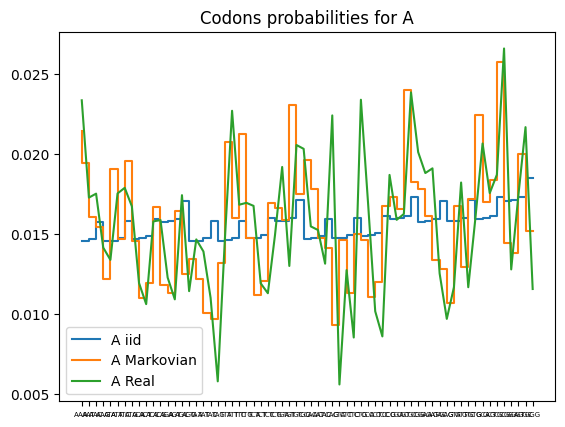

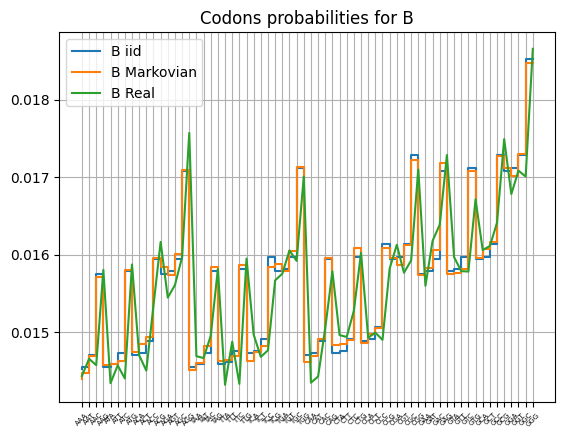

In [475]:
plt.step(random_codons.keys(), random_codons.values(), label = 'A iid')
plt.step(A_Markovian.keys(), A_Markovian.values(), label='A Markovian')
plt.plot(A_codons.keys(), A_codons.values(), label = 'A Real')
plt.title('Codons probabilities for A')
plt.legend(loc='best')
plt.show()

plt.step(random_codons.keys(), random_codons.values(), label = 'B iid')
plt.step(B_Markovian.keys(), B_Markovian.values(), label='B Markovian')
#plt.step(B_memory.keys(), B_memory.values(), label = 'B with memory')
plt.plot(B_codons_no_overlap.keys(), B_codons_no_overlap.values(), label = 'B Real')
plt.title('Codons probabilities for B')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid()
plt.show()



In [498]:
def deviation_from_real(Z_compare, Z_real):
    Z_deviations = [np.abs(Z_compare[k]-Z_real[k]) for k in random_codons.keys()]
    max_deviation = max(Z_deviations)
    max_codon_index = Z_deviations.index(max_deviation)
    max_codon = list(Z_compare.keys())[max_codon_index]
    max_prob = Z_real[max_codon]
    return max_codon, math.floor(max_prob*n)

B_md_Mark_codon, B_md_Mark_n = deviation_from_real(B_Markovian, B_codons_no_overlap)
B_Mark_prob = B_Markovian[B_md_Mark_codon]
print('Comparing Markovian from real')
print(B_md_Mark_codon, B_md_Mark_n, math.floor(B_Mark_prob*n))

B_md_iid_codon, B_md_iid_n = deviation_from_real(random_codons, B_codons_no_overlap)
B_iid_prob=random_codons[B_md_iid_codon]
print('Comparing iid from real')
print(B_md_iid_codon, B_md_iid_n, math.floor(B_iid_prob*n))

# A_p_value=1-scipy.special.betainc(n-A_md_n, 1+A_md_n, 1-A_md_prob)
B_p_value_Mark=1-scipy.special.betainc(n-B_md_Mark_n, 1+B_md_Mark_n, 1-B_Mark_prob)
B_p_value_iid=1-scipy.special.betainc(n-B_md_iid_n, 1+B_md_iid_n, 1-B_iid_prob)
# print(f'p-value for A: {A_p_value}')
print(f'p-value for B Markovian: {B_p_value_Mark}')
print(f'p-value for B iid: {B_p_value_iid}')

Comparing Markovian from real
AGG 5746 5589
Comparing iid from real
AGG 5746 5586
p-value for B Markovian: 0.017285091761326532
p-value for B iid: 0.015669413161821577


In [491]:
print(B_Mark_prob,B_iid_prob)

0.01709036833098563 0.017081484224257093


In [497]:
1-scipy.special.betainc(n-B_md_iid_n, 1+B_md_iid_n, 1-0.017090)

0.017215394056456113

# Some bullshit

In [1]:
import matplotlib.pyplot as plt

#A=''
with open('A.fna') as f:
    # for line in f:
    #     A+=line.strip()
    A = f.read()
    # A = f.read().split('\n')
    # A = A.flatten()

temp = open('A.fna','r').read().split('\n')
AA = ''.join(temp)

with open('B.fna') as f:
    B = f.read()
    #A = A.flatten()

temp = open('B.fna','r').read().split('\n')
BB = ''.join(temp)

D='HOOOOLA\nwey'
def isDNA(C):
    nonNuc=[]
    for N in C:
        if N!='A' and N!='T' and N!='G' and N!='C' and N!='\n':
            nonNuc.append(N)
            print(N)
    if len(nonNuc)==0:
        return(True)
    else:
        return(False)

def countNuc(C, N):
    num_N = 0
    for nuc in C:
        if nuc==N:
            num_N+=1
    return num_N


def probN1_N2(C,N1,N2):
    num_N1=0
    num_N1_N2=0
    for i in range(len(C)-1):
        if C[i] == N1:
            num_N1 += 1
            if C[i+1] == N2:
                num_N1_N2 += 1
    return num_N1_N2/num_N1


def probN1N2_N3(C,N1,N2,N3):
    num_N1N2=0
    num_N1N2_N3=0
    for i in range(len(C)-2):
        if C[i] == N1 and C[i+1]==N2:
            num_N1N2 += 1
            if C[i+2] == N3:
                num_N1N2_N3 += 1
    return num_N1N2_N3/num_N1N2

def probN1N2N3_N4(C,N1,N2,N3,N4):
    num_N1N2N3=0
    num_N1N2N3_N4=0
    for i in range(len(C)-3):
        if C[i] == N1 and C[i+1]==N2 and C[i+2]==N3:
            num_N1N2N3 += 1
            if C[i+3] == N4:
                num_N1N2N3_N4 += 1
    return num_N1N2N3_N4/num_N1N2N3


A_A = countNuc(A,'A')/len(A)*100
T_A = countNuc(A,'T')/len(A)*100
G_A = countNuc(A,'G')/len(A)*100
C_A = countNuc(A,'C')/len(A)*100


A_B = countNuc(B,'A')/len(B)*100
T_B = countNuc(B,'T')/len(B)*100
G_B = countNuc(B,'G')/len(B)*100
C_B = countNuc(B,'C')/len(B)*100

A_C = countNuc(D,'A')
T_C = countNuc(D,'T')
G_C = countNuc(D,'G')
C_C = countNuc(D,'C')


print(A_A, T_A, G_A, C_A)
print(A_B, T_B, G_B, C_B)
print(A_C, T_C, G_C, C_C)

print(A[0:10], B[-10:-1])

len(AA)
AA[20000]=='T'

print(A[0:10])

AA_A = probN1_N2(AA,'C','A')
AA_T = probN1_N2(AA,'C','T')
AA_C = probN1_N2(AA,'C','C')
AA_G = probN1_N2(AA,'C','G')

BA_A = probN1_N2(BB,'C','A')
BA_T = probN1_N2(BB,'C','T')
BA_C = probN1_N2(BB,'C','C')
BA_G = probN1_N2(BB,'C','G')

print(AA_A, AA_T, AA_C, AA_G)
print(BA_A, BA_T, BA_C, BA_G)

ATT_A = probN1N2_N3(AA,'T','T', 'A')
ATT_T = probN1N2_N3(AA,'T','T', 'T')
ATT_C = probN1N2_N3(AA,'T','T', 'C')
ATT_G = probN1N2_N3(AA,'T','T', 'G')

BTT_A = probN1N2_N3(BB,'T','T', 'A')
BTT_T = probN1N2_N3(BB,'T','T', 'T')
BTT_C = probN1N2_N3(BB,'T','T', 'C')
BTT_G = probN1N2_N3(BB,'T','T', 'G')

print(ATT_A,ATT_T,ATT_C,ATT_G)
print(BTT_A,BTT_T,BTT_C,BTT_G)

probN1N2_N3(D,'O', 'O', 'L')
print('TTTT')
print(probN1N2N3_N4(AA,'T', 'T', 'T', 'T'))
print(probN1N2N3_N4(BB,'T', 'T', 'T', 'T'))

print('AAAA')
print(probN1N2N3_N4(AA,'A', 'A', 'A', 'A'))
print(probN1N2N3_N4(BB,'A', 'A', 'A', 'A'))

print('CCCC')
print(probN1N2N3_N4(AA,'C', 'C', 'C', 'C'))
print(probN1N2N3_N4(BB,'C', 'C', 'C', 'C'))

print('GGGG')
print(probN1N2N3_N4(AA,'G', 'G', 'G', 'G'))
print(probN1N2N3_N4(BB,'G', 'G', 'G', 'G'))

23.999735334631264 24.045951522126625 26.025026917671024 24.289864719905843
23.999735334631264 24.045951522126625 26.025026917671024 24.289864719905843
1 0 0 0
TGGTCCCACC ACATGGCGT
TGGTCCCACC
0.26833466095993597 0.20336625572152034 0.22013562428029568 0.30816345903824804
0.24367694644390148 0.24557964075810607 0.24690038301525458 0.2638430297827379
0.20663783969531227 0.3189628017525271 0.2363763924286246 0.238022966123536
0.24200143105386895 0.2490033731984054 0.24372210296773314 0.2652730927799925
TTTT
0.3251784351573372
0.24507389162561577
AAAA
0.3208115183246073
0.23987274655355248
CCCC
0.160156713759943
0.243145792230764
GGGG
0.20541780640607077
0.26496759310117546
